In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

In [11]:
x,y = make_blobs(random_state=1)

In [12]:
agg=  AgglomerativeClustering(n_clusters=3)
a= agg.fit_predict(x)

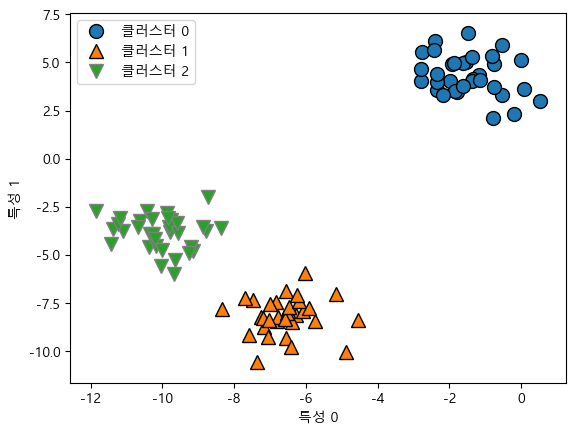

In [13]:
mglearn.discrete_scatter(x[:,0], x[:,1], a)
plt.legend(['클러스터 0','클러스터 1','클러스터 2'], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

In [14]:
from scipy.cluster.hierarchy import dendrogram, ward, linkage

In [15]:
x, y = make_blobs(random_state=0, n_samples=12)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [62.5, 62.5, 93.75, 93.75],
  [21.25, 21.25, 78.125, 78.125]],
 'dcoord': [[0.0, 0.3320945047164902, 0.3320945047164902, 0.0],
  [0.0, 0.9268322277319817, 0.9268322277319817, 0.0],
  [0.0, 1.6004181164464242, 1.6004181164464242, 0.9268322277319817],
  [0.3320945047164902,
   2.078157949404743,
   2.078157949404743,
   1.6004181164464242],
  [0.0, 1.1803786988620995, 1.1803786988620995, 0.0],
  [0.0, 1.3031157463723073, 1.3031157463723073, 1.1803786988620995],
  [0.0, 0.6458019336639491, 0.6458019336639491, 0.0],
  [0.0, 1.4440338959892802, 1.4440338959892802, 0.6458019336639491],
  [0.0, 2.1598188624745154, 2.1598188624745154, 1.4440338959892802],
  [1.3031157463723073,
   6.550248535823649,
   6.550248535823649,
   2.15

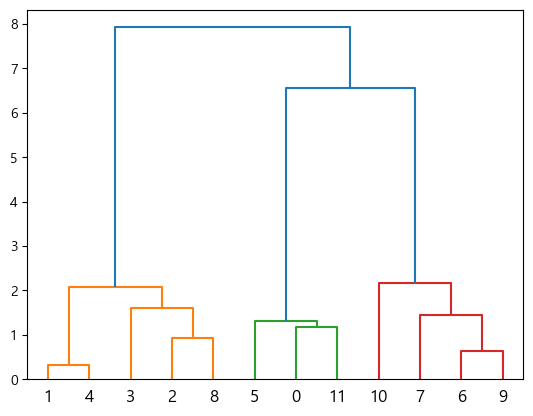

In [16]:
# 데이터 배열에 x에 ward 함수를 적용
# 계층적군집을 수행할 때 거리 정보가 담긴 배열을 리턴
linkage_array = ward(x)

# 클러스터 간 거리 정보가 담긴 linkage_array를 사용해서 덴드로그램을 그림
dendrogram(linkage_array)

# 
ax